In [1]:
import pandas as pd

#Import data
df=pd.read_csv("Form_Responses.csv")

In [2]:
df['Age'] = pd.to_numeric(df['Age'], errors='coerce').astype('Int64')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 312 entries, 0 to 311
Data columns (total 42 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Age                                  312 non-null    Int64  
 1   Gender                               312 non-null    object 
 2   Current_Level_of_Studies             312 non-null    object 
 3   Field_of_Study                       312 non-null    object 
 4   Type_of_Institution                  312 non-null    object 
 5   Academic_Satisfaction                312 non-null    object 
 6   Study_Hours_Per_Week                 312 non-null    int64  
 7   Academic_Engagement                  312 non-null    object 
 8   Academic_Workload                    312 non-null    object 
 9   Coursework_Pressure                  312 non-null    object 
 10  Academic_Performance                 312 non-null    object 
 11  Sleep_Hours_Per_Night           

In [4]:
print(df.isnull().sum())

Age                                    0
Gender                                 0
Current_Level_of_Studies               0
Field_of_Study                         0
Type_of_Institution                    0
Academic_Satisfaction                  0
Study_Hours_Per_Week                   0
Academic_Engagement                    0
Academic_Workload                      0
Coursework_Pressure                    0
Academic_Performance                   0
Sleep_Hours_Per_Night                  0
Eating_Nutrition_Habits                0
Physical_Activity_Freq                 0
Social_Support                         0
Romantic_Satisfaction                  0
Financial_Stress                       0
CoCurricular_Involvement               0
Isolation_Frequency                    0
Family_History_Mental_Illness          0
Recent_Suicidal_Thoughts               0
phq1                                   0
phq2                                   0
phq3                                   0
phq4            

In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier, StackingClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, f1_score
import xgboost as xgb
import lightgbm as lgb
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import warnings
import joblib

# Encoding categorical variables using LabelEncoder
encoder = LabelEncoder()

# Columns that are categorical
categorical_columns = ["Gender", "Current_Level_of_Studies", "Field_of_Study", "Type_of_Institution", "Academic_Satisfaction", 
                       "Study_Hours_Per_Week", "Academic_Engagement", "Academic_Workload", "Coursework_Pressure", 
                       "Academic_Performance", "Sleep_Hours_Per_Night", "Eating_Nutrition_Habits", "Physical_Activity_Freq", 
                       "Social_Support", "Romantic_Satisfaction", "Financial_Stress", "CoCurricular_Involvement", "Isolation_Frequency", 
                       "Family_History_Mental_Illness", "Recent_Suicidal_Thoughts", "Depressed_Anxious", "Feelings_Emotions_Over_Past_2_Weeks"]

for col in categorical_columns:
    df[col] = encoder.fit_transform(df[col])

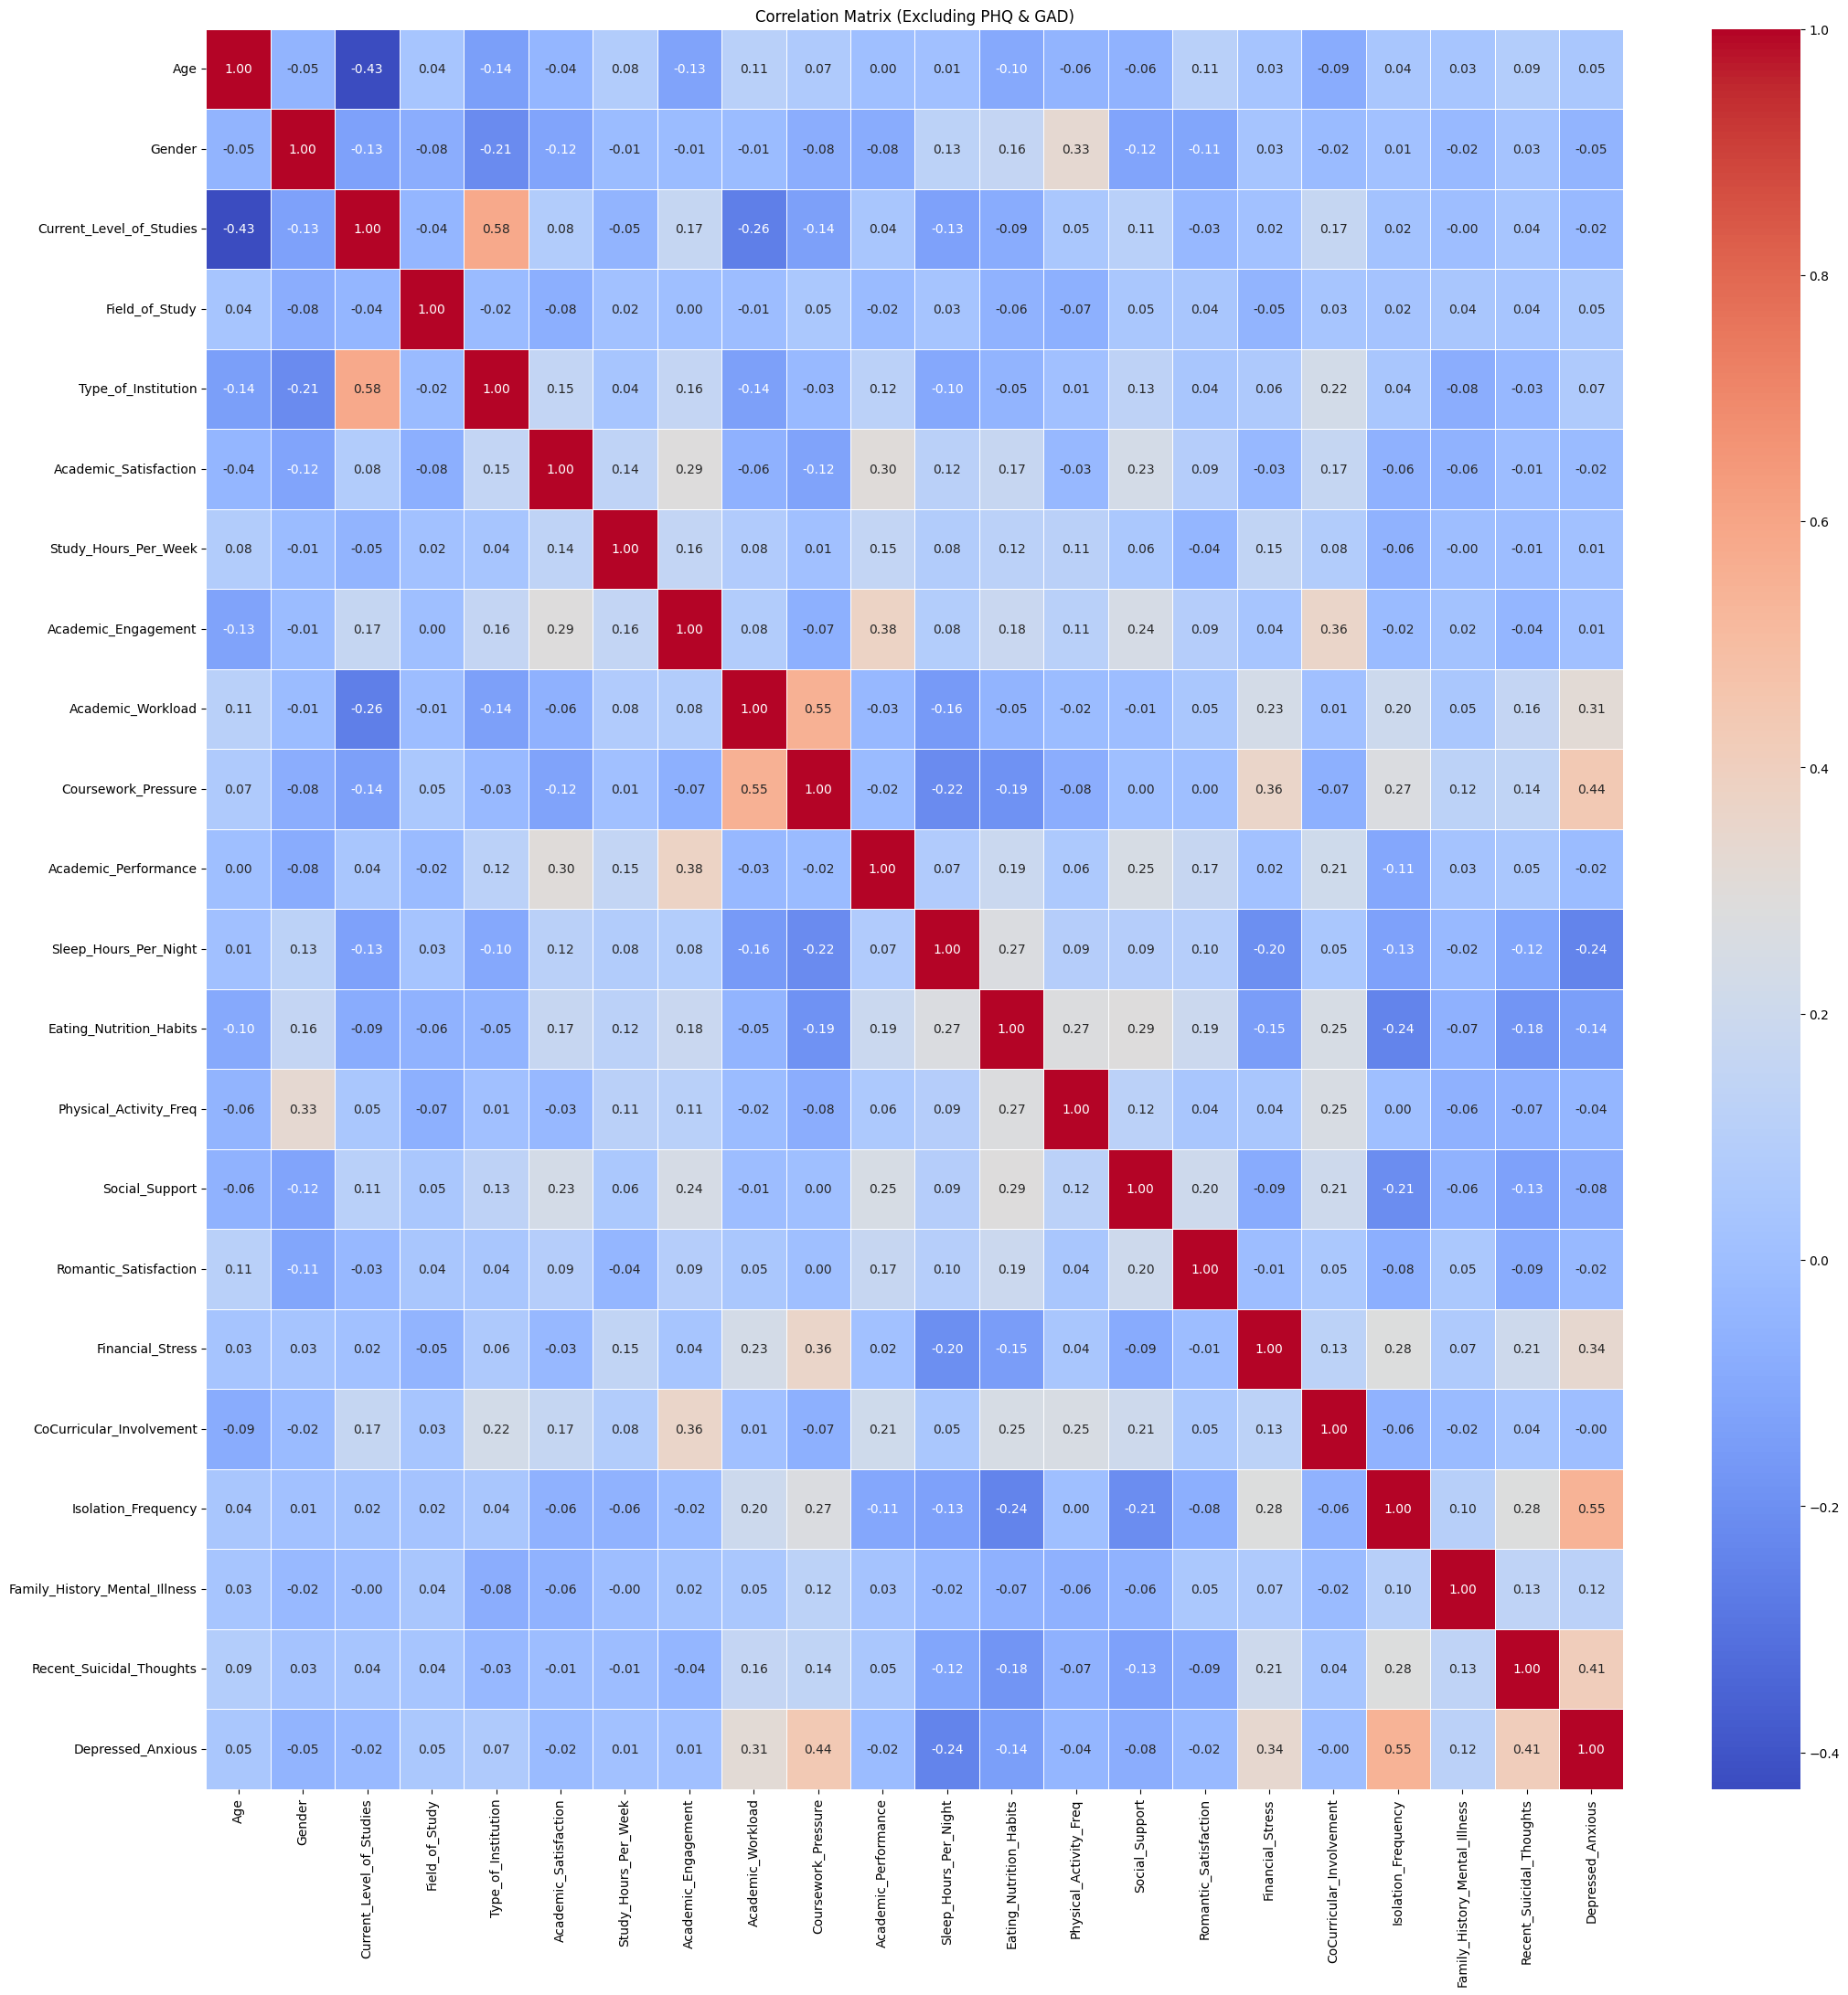

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of features to exclude
exclude_features = [
    "Total_Score", "Depression_Score", "Anxiety_Score", "Feelings_Emotions_Over_Past_2_Weeks", 
    "phq1", "phq2", "phq3", "phq4", "phq5", "phq6", "phq7", "phq8", "phq9", 
    "gad1", "gad2", "gad3", "gad4", "gad5", "gad6", "gad7"
]

# Drop the excluded features
filtered_df = df.drop(columns=exclude_features)

# Compute the correlation matrix
corr_matrix = filtered_df.corr()

# Plot the heatmap
plt.figure(figsize=(25, 25))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix (Excluding PHQ & GAD)")
plt.show()

In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier, StackingClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, f1_score
import xgboost as xgb
import lightgbm as lgb
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import warnings
import joblib

# Optional: Ignore warnings
warnings.filterwarnings('ignore')


# Define features and target
X = df.drop(["Total_Score", "Depressed_Anxious", "Depression_Score", "Anxiety_Score", "Feelings_Emotions_Over_Past_2_Weeks", 
    "phq1", "phq2", "phq3", "phq4", "phq5", "phq6", "phq7", "phq8", "phq9", "gad1", "gad2", "gad3", "gad4", "gad5", "gad6", "gad7",
            "Academic_Satisfaction", "Eating_Nutrition_Habits", "Academic_Performance", "Type_of_Institution", "Romantic_Satisfaction",
            "Gender", "Social_Support", "Academic_Engagement", "Current_Level_of_Studies", "Family_History_Mental_Illness", "Field_of_Study"], axis=1) 
y = df["Depressed_Anxious"]

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_train = X_train.astype('float64')

# Initialize classifiers
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": xgb.XGBClassifier(n_estimators=100, use_label_encoder=False, eval_metric='mlogloss', random_state=42),
    "Extra Trees": ExtraTreesClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=42),
    "LightGBM": lgb.LGBMClassifier(n_estimators=100, random_state=42, verbosity=-1),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "SVC": SVC(probability=True, kernel='rbf', random_state=42)
}

# Evaluate models with 10-fold cross-validation
cv_results = {}
for model_name, model in models.items():
    acc_scores = cross_val_score(model, X_train, y_train, cv=10, scoring='accuracy')
    f1_scores = cross_val_score(model, X_train, y_train, cv=10, scoring='f1_macro')
    cv_results[model_name] = {
        "Mean Accuracy": acc_scores.mean(),
        "Std Accuracy": acc_scores.std(),
        "Mean F1-Score": f1_scores.mean(),
        "F1-Score Std": f1_scores.std()
    }

# Print sorted results
sorted_cv_results = sorted(cv_results.items(), key=lambda x: x[1]['Mean F1-Score'], reverse=True)
for model_name, result in sorted_cv_results:
    print(f"{model_name} - Mean F1-Score: {result['Mean F1-Score']:.4f} (+/- {result['F1-Score Std']:.4f})")
    print("=" * 50)
    
# Select top 2 models
top_models = [sorted_cv_results[0][0], sorted_cv_results[1][0]]
print(f"Top 2 Models for Stacking: {top_models[0]} and {top_models[1]}")

# Stacking model
stack_base_learners = [
    (top_models[0], models[top_models[0]]),
    (top_models[1], models[top_models[1]])
]
meta_model = LogisticRegression()
stack_model = StackingClassifier(estimators=stack_base_learners, final_estimator=meta_model)

# Train stacking model on resampled data
stack_model.fit(X_train, y_train)

# Save the stacking model
#joblib.dump(stack_model, 'log_stacking_model.pkl')

# Predict on test set
y_pred_stack = stack_model.predict(X_test)

# Evaluate stacking model
stack_accuracy = accuracy_score(y_test, y_pred_stack)
stack_classification_rep = classification_report(y_test, y_pred_stack)

print(f"\nStacked Model Accuracy: {stack_accuracy:.4f}")
print("Stacked Model Classification Report:")
print(stack_classification_rep)

# -------------------------
# Feature Importance Section
# -------------------------

def get_feature_importance(model, X):
    if hasattr(model, 'feature_importances_'):
        return model.feature_importances_
    elif isinstance(model, xgb.XGBClassifier):
        return model.feature_importances_
    elif isinstance(model, lgb.LGBMClassifier):
        return model.feature_importances_
    else:
        return np.zeros(X.shape[1])  # fallback

first_model = models[top_models[0]]
second_model = models[top_models[1]]
first_model.fit(X_train, y_train)
second_model.fit(X_train, y_train)

first_importances = get_feature_importance(first_model, X_train)
second_importances = get_feature_importance(second_model, X_train)

first_importances = np.array(first_importances)
second_importances = np.array(second_importances)

first_importances_normalized = first_importances / (first_importances.max() + 1e-8)
second_importances_normalized = second_importances / (second_importances.max() + 1e-8)
combined_importances = (first_importances_normalized + second_importances_normalized) / 2

# Display feature importances
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Combined Importance': combined_importances
}).sort_values(by='Combined Importance', ascending=False)

print("\nTop 10 Important Features:")
print(importance_df.head(10))

Logistic Regression - Mean F1-Score: 0.5198 (+/- 0.1593)
Random Forest - Mean F1-Score: 0.4957 (+/- 0.1307)
Gradient Boosting - Mean F1-Score: 0.4672 (+/- 0.0775)
LightGBM - Mean F1-Score: 0.4528 (+/- 0.1259)
Extra Trees - Mean F1-Score: 0.4461 (+/- 0.0976)
XGBoost - Mean F1-Score: 0.4161 (+/- 0.0824)
SVC - Mean F1-Score: 0.2673 (+/- 0.0043)
Top 2 Models for Stacking: Logistic Regression and Random Forest

Stacked Model Accuracy: 0.7660
Stacked Model Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.92      0.89        66
           1       0.67      0.14      0.24        14
           2       0.45      0.64      0.53        14

    accuracy                           0.77        94
   macro avg       0.66      0.57      0.55        94
weighted avg       0.77      0.77      0.74        94


Top 10 Important Features:
                    Feature  Combined Importance
8       Isolation_Frequency             0.500000
1      Study_Ho

In [8]:
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_validate


# Define scoring metrics for cross-validation
scoring_metrics = {
    "accuracy": "accuracy",
    "precision": make_scorer(precision_score, average="macro"),
    "recall": make_scorer(recall_score, average="macro"),
    "f1": make_scorer(f1_score, average="macro")
}

# Dictionary to store results
cv_results = {}

# Perform cross-validation for each model
for model_name, model in models.items():
    scores = cross_validate(model, X_train, y_train, cv=10, scoring=scoring_metrics)
    
    cv_results[model_name] = {
        "Mean Accuracy": scores["test_accuracy"].mean(),
        "Mean Precision": scores["test_precision"].mean(),
        "Mean Recall": scores["test_recall"].mean(),
        "Mean F1-Score": scores["test_f1"].mean()
    }

# Sort models by Mean F1-Score (descending)
sorted_cv_results = sorted(cv_results.items(), key=lambda x: x[1]["Mean F1-Score"], reverse=True)

# Display results
print("\nModel Performance Summary (10-Fold Cross-Validation)\n")
print("=" * 60)
for model_name, result in sorted_cv_results:
    print(f"{model_name}:")
    print(f"  - Mean Accuracy:  {result['Mean Accuracy']:.4f}")
    print(f"  - Mean Precision: {result['Mean Precision']:.4f}")
    print(f"  - Mean Recall:    {result['Mean Recall']:.4f}")
    print(f"  - Mean F1-Score:  {result['Mean F1-Score']:.4f}")
    print("-" * 60)

# Select the top two models based on Mean F1-Score
top_models = [sorted_cv_results[0][0], sorted_cv_results[1][0]]
print(f"\nTop 2 Models for Stacking: {top_models[0]} and {top_models[1]}")


Model Performance Summary (10-Fold Cross-Validation)

Logistic Regression:
  - Mean Accuracy:  0.7251
  - Mean Precision: 0.5703
  - Mean Recall:    0.5214
  - Mean F1-Score:  0.5198
------------------------------------------------------------
Random Forest:
  - Mean Accuracy:  0.7203
  - Mean Precision: 0.5143
  - Mean Recall:    0.5159
  - Mean F1-Score:  0.4957
------------------------------------------------------------
Gradient Boosting:
  - Mean Accuracy:  0.6742
  - Mean Precision: 0.5281
  - Mean Recall:    0.4725
  - Mean F1-Score:  0.4672
------------------------------------------------------------
LightGBM:
  - Mean Accuracy:  0.6604
  - Mean Precision: 0.4957
  - Mean Recall:    0.4629
  - Mean F1-Score:  0.4528
------------------------------------------------------------
Extra Trees:
  - Mean Accuracy:  0.6883
  - Mean Precision: 0.4670
  - Mean Recall:    0.4556
  - Mean F1-Score:  0.4461
------------------------------------------------------------
XGBoost:
  - Mean Accu

Silhouette Score with PCA-based clustering: 0.6631


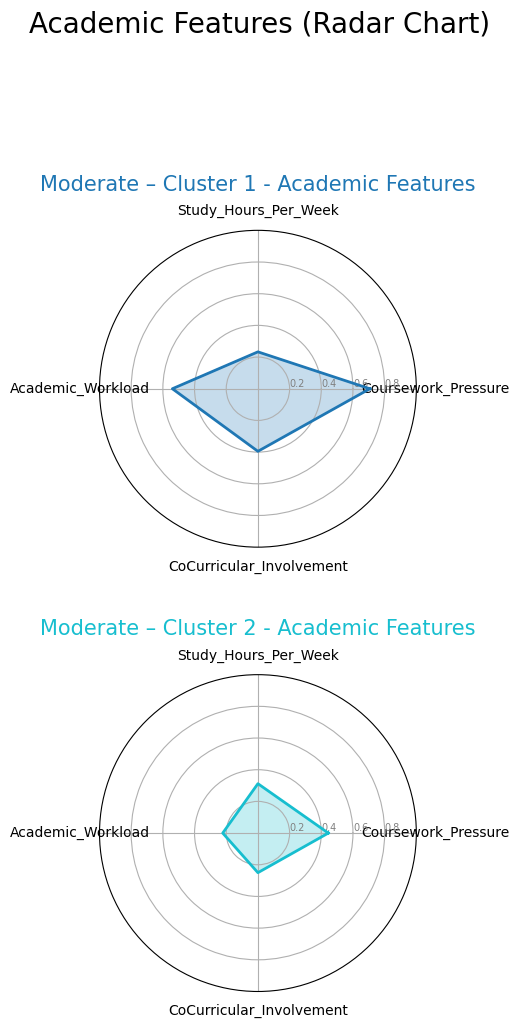

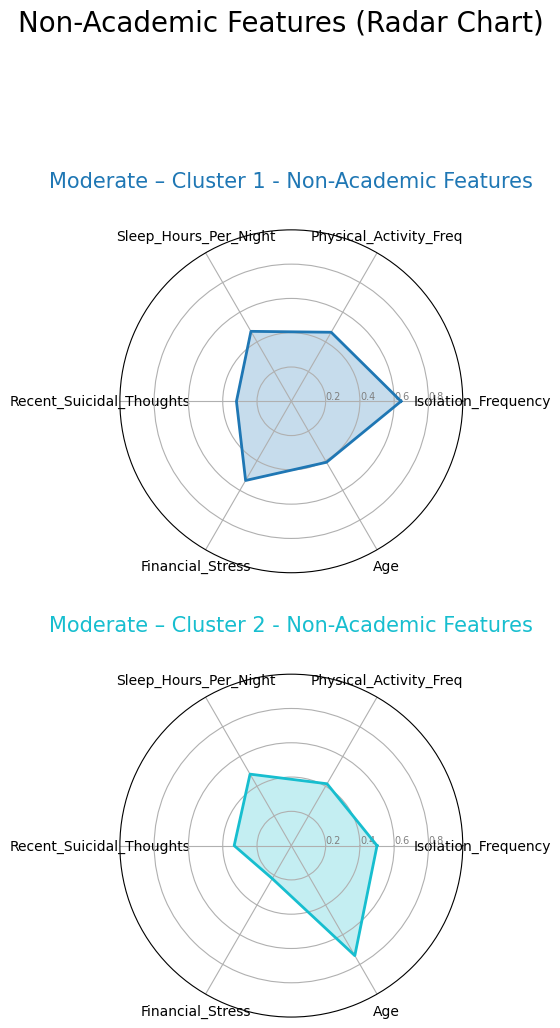

In [9]:
import matplotlib.pyplot as plt
from math import pi
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import pandas as pd
import numpy as np
import seaborn as sns

# ----------------------------------
# Step 1: Feature Grouping
# ----------------------------------
academic_features = [
    "Coursework_Pressure", "Study_Hours_Per_Week", "Academic_Workload",
    "CoCurricular_Involvement"
]

non_academic_features = [
    "Isolation_Frequency", "Physical_Activity_Freq", "Sleep_Hours_Per_Night",
    "Recent_Suicidal_Thoughts", "Financial_Stress", "Age"
]

all_features = academic_features + non_academic_features

# ----------------------------------
# Step 2: Scale & Filter Depressed Group
# ----------------------------------
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[all_features])
df_scaled = pd.DataFrame(scaled_data, columns=all_features)
df_scaled['Depressed_Anxious'] = df['Depressed_Anxious'].values

# Filter only moderate group
df_moderate = df_scaled[df_scaled['Depressed_Anxious'] == 1].copy()

# ----------------------------------
# Step 3: PCA Dimensionality Reduction
# ----------------------------------
pca = PCA(n_components=2, random_state=42)
reduced_features = pca.fit_transform(df_moderate[all_features])

# ----------------------------------
# Step 4: KMeans Clustering on PCA-Reduced Data
# ----------------------------------
kmeans = KMeans(n_clusters=2, random_state=42)
df_moderate['Cluster'] = kmeans.fit_predict(reduced_features)

# ----------------------------------
# Step 5: Silhouette Score
# ----------------------------------
silhouette = silhouette_score(reduced_features, df_moderate['Cluster'])
print(f"Silhouette Score with PCA-based clustering: {silhouette:.4f}")

# ----------------------------------
# Step 6: Normalize Features for Radar Chart
# ----------------------------------
scaler_radar = MinMaxScaler()
df_moderate[all_features] = scaler_radar.fit_transform(df_moderate[all_features])

# ----------------------------------
# Step 7: Assign Meaningful Labels
# ----------------------------------
cluster_means = df_moderate.groupby('Cluster')[all_features].mean()
#cluster_means.to_csv('moderate_cluster_profiles.csv')

academic_scores = cluster_means[academic_features].mean(axis=1)

if academic_scores[0] > academic_scores[1]:
    label_map = {
        0: 'Moderate – Cluster 1',
        1: 'Moderate – Cluster 2'
    }
else:
    label_map = {
        1: 'Moderate – Cluster 1',
        0: 'Moderate – Cluster 2'
    }

df_moderate['Cluster_Label'] = df_moderate['Cluster'].map(label_map)

# ----------------------------------
# Step 8: Radar Chart Function
# ----------------------------------
def create_radar_by_group(data, feature_set, title_suffix):
    num_vars = len(feature_set)
    angles = [n / float(num_vars) * 2 * pi for n in range(num_vars)]
    angles += angles[:1]

    clusters = sorted(data['Cluster_Label'].unique())
    colors = plt.cm.get_cmap("tab10", len(clusters)).colors

    fig, axs = plt.subplots(len(clusters), 1, figsize=(6, 5 * len(clusters)), subplot_kw=dict(polar=True))
    if len(clusters) == 1:
        axs = [axs]

    for i, cluster_label in enumerate(clusters):
        ax = axs[i]
        plt.sca(ax)
        plt.xticks(angles[:-1], feature_set, size=10)
        ax.set_rlabel_position(0)
        plt.yticks([0.2, 0.4, 0.6, 0.8], ["0.2", "0.4", "0.6", "0.8"], color="grey", size=7)
        plt.ylim(0, 1)

        values = data[data['Cluster_Label'] == cluster_label][feature_set].mean().values.flatten().tolist()
        values += values[:1]
        ax.plot(angles, values, linewidth=2, linestyle='solid', color=colors[i])
        ax.fill(angles, values, alpha=0.25, color=colors[i])
        ax.set_title(f'{cluster_label} - {title_suffix}', size=15, color=colors[i], y=1.1)

    fig.suptitle(f'{title_suffix} (Radar Chart)', size=20, y=1.05)
    plt.tight_layout(pad=3.0)
    plt.show()

# ----------------------------------
# Step 9: Generate Radar Charts
# ----------------------------------
create_radar_by_group(df_moderate, academic_features, title_suffix="Academic Features")
create_radar_by_group(df_moderate, non_academic_features, title_suffix="Non-Academic Features")

Silhouette Score with PCA-based clustering: 0.4084


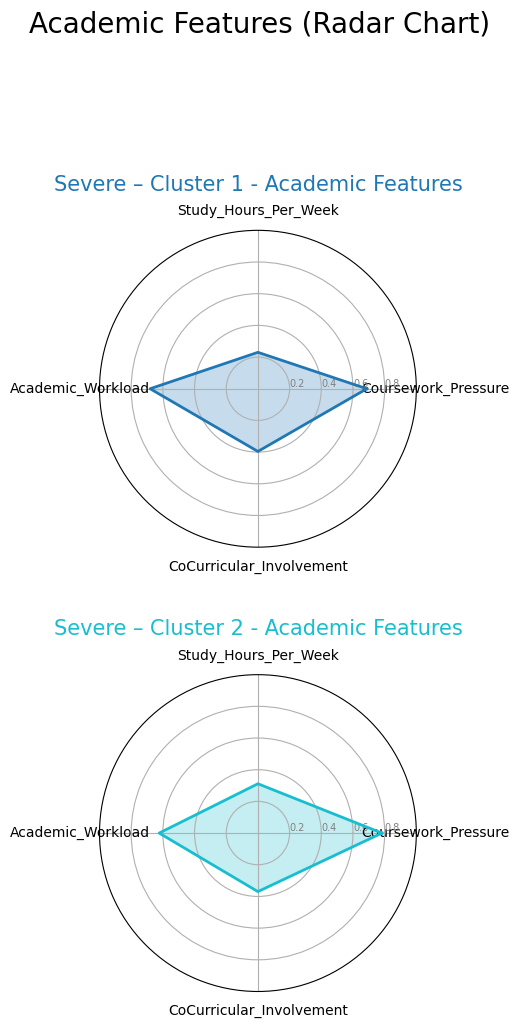

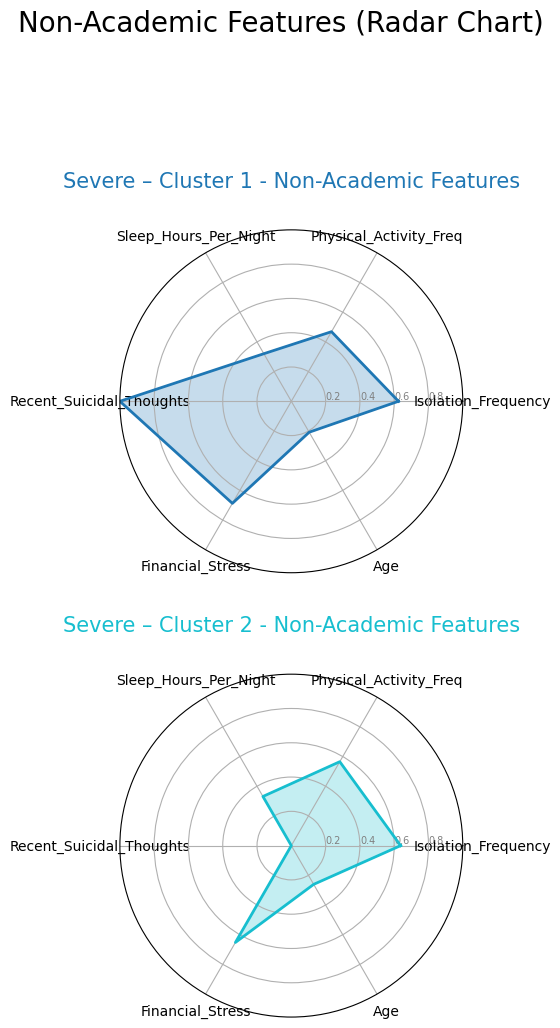

In [10]:
import matplotlib.pyplot as plt
from math import pi
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import pandas as pd
import numpy as np
import seaborn as sns

# ----------------------------------
# Step 1: Feature Grouping
# ----------------------------------
academic_features = [
    "Coursework_Pressure", "Study_Hours_Per_Week", "Academic_Workload",
    "CoCurricular_Involvement"
]

non_academic_features = [
    "Isolation_Frequency", "Physical_Activity_Freq", "Sleep_Hours_Per_Night",
    "Recent_Suicidal_Thoughts", "Financial_Stress", "Age"
]

all_features = academic_features + non_academic_features

# ----------------------------------
# Step 2: Scale & Filter Severe Group
# ----------------------------------
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[all_features])
df_scaled = pd.DataFrame(scaled_data, columns=all_features)
df_scaled['Depressed_Anxious'] = df['Depressed_Anxious'].values

# Filter only severe group
df_severe = df_scaled[df_scaled['Depressed_Anxious'] == 2].copy()

# ----------------------------------
# Step 3: PCA Dimensionality Reduction
# ----------------------------------
pca = PCA(n_components=2, random_state=42)
reduced_features = pca.fit_transform(df_severe[all_features])

# ----------------------------------
# Step 4: KMeans Clustering on PCA-Reduced Data
# ----------------------------------
kmeans = KMeans(n_clusters=2, random_state=42)
df_severe['Cluster'] = kmeans.fit_predict(reduced_features)

# ----------------------------------
# Step 5: Silhouette Score
# ----------------------------------
silhouette = silhouette_score(reduced_features, df_severe['Cluster'])
print(f"Silhouette Score with PCA-based clustering: {silhouette:.4f}")

# ----------------------------------
# Step 6: Normalize Features for Radar Chart
# ----------------------------------
scaler_radar = MinMaxScaler()
df_severe[all_features] = scaler_radar.fit_transform(df_severe[all_features])

# ----------------------------------
# Step 7: Assign Meaningful Labels
# ----------------------------------
severe_cluster_means = df_severe.groupby('Cluster')[all_features].mean()
# severe_cluster_means.to_csv('severe_cluster_profiles.csv')

academic_scores = cluster_means[academic_features].mean(axis=1)

if academic_scores[0] > academic_scores[1]:
    label_map = {
        0: 'Severe – Cluster 1',
        1: 'Severe – Cluster 2'
    }
else:
    label_map = {
        1: 'Severe – Cluster 1',
        0: 'Severe – Cluster 2'
    }

df_severe['Cluster_Label'] = df_severe['Cluster'].map(label_map)

# ----------------------------------
# Step 8: Radar Chart Function
# ----------------------------------
def create_radar_by_group(data, feature_set, title_suffix):
    num_vars = len(feature_set)
    angles = [n / float(num_vars) * 2 * pi for n in range(num_vars)]
    angles += angles[:1]

    clusters = sorted(data['Cluster_Label'].unique())
    colors = plt.cm.get_cmap("tab10", len(clusters)).colors

    fig, axs = plt.subplots(len(clusters), 1, figsize=(6, 5 * len(clusters)), subplot_kw=dict(polar=True))
    if len(clusters) == 1:
        axs = [axs]

    for i, cluster_label in enumerate(clusters):
        ax = axs[i]
        plt.sca(ax)
        plt.xticks(angles[:-1], feature_set, size=10)
        ax.set_rlabel_position(0)
        plt.yticks([0.2, 0.4, 0.6, 0.8], ["0.2", "0.4", "0.6", "0.8"], color="grey", size=7)
        plt.ylim(0, 1)

        values = data[data['Cluster_Label'] == cluster_label][feature_set].mean().values.flatten().tolist()
        values += values[:1]
        ax.plot(angles, values, linewidth=2, linestyle='solid', color=colors[i])
        ax.fill(angles, values, alpha=0.25, color=colors[i])
        ax.set_title(f'{cluster_label} - {title_suffix}', size=15, color=colors[i], y=1.1)

    fig.suptitle(f'{title_suffix} (Radar Chart)', size=20, y=1.05)
    plt.tight_layout(pad=3.0)
    plt.show()

# ----------------------------------
# Step 9: Generate Radar Charts
# ----------------------------------
create_radar_by_group(df_severe, academic_features, title_suffix="Academic Features")
create_radar_by_group(df_severe, non_academic_features, title_suffix="Non-Academic Features")

In [11]:
# moderate_df = pd.read_csv("moderate_cluster_profiles.csv", index_col=0)
# severe_df = pd.read_csv("severe_cluster_profiles.csv", index_col=0)

# moderate_df['Group'] = 'Moderate'
# severe_df['Group'] = 'Severe'

# combined_df = pd.concat([moderate_df, severe_df])

# combined_df.to_csv("all_cluster_profiles.csv")